**Import the Libraries**



In [ ]:
#Import the Libraries
import pandas as pd
import numpy as np
import datetime
from sklearn import datasets
import pandas_datareader as web
from pandas.io.formats.style_render import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, LSTM, Bidirectional
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

**Import CSV File**

In [ ]:
from google.colab import files
dataset = files.upload()

Saving RELIANCE.NS (7).csv to RELIANCE.NS (7).csv


In [ ]:
Relince_stock = pd.read_csv("RELIANCE.NS (7).csv")
Relince_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-21,484.642059,487.933655,483.316284,486.082123,469.415161,10183947
1,2016-12-22,483.682007,485.807831,480.458984,481.556183,465.044434,14446417
2,2016-12-23,480.938995,488.687988,480.938995,483.362000,466.788300,5132516
3,2016-12-26,482.013336,487.339325,477.578827,478.858887,462.439575,7660885
4,2016-12-27,479.041779,487.842224,478.653168,486.745026,470.055328,8721424


In [ ]:
Relince_stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1778,2024-02-29,2930.000000,2957.949951,2909.050049,2921.600098,2921.600098,11814488
1779,2024-03-01,2927.000000,3000.000000,2925.000000,2984.250000,2984.250000,6066463
1780,2024-03-04,2980.949951,3024.899902,2974.449951,3014.800049,3014.800049,5012210
1781,2024-03-05,3011.550049,3014.800049,2972.100098,3000.399902,3000.399902,3553834
1782,2024-03-06,2986.899902,3018.000000,2957.000000,3006.000000,3006.000000,3902838


In [ ]:
Relince_stock.shape

(1783, 7)

In [ ]:
Relince_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1.783000e+03
mean,1619.601342,1636.648588,1601.640474,1618.587728,1602.297473,9.870486e+06
std,669.713089,675.306431,663.807634,669.501381,674.304320,7.492708e+06
min,464.938171,470.332733,463.018097,464.435303,448.510590,8.528280e+05
25%,1012.920624,1027.664246,1001.788636,1013.492096,994.124054,5.534738e+06
50%,1770.313354,1789.234863,1744.884766,1764.498535,1746.480591,7.642137e+06
75%,2250.525024,2274.686524,2230.013428,2250.873169,2238.493774,1.128542e+07
max,3011.550049,3024.899902,2974.449951,3014.800049,3014.800049,7.134168e+07


In [ ]:
Relince_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1783 non-null   object 
 1   Open       1783 non-null   float64
 2   High       1783 non-null   float64
 3   Low        1783 non-null   float64
 4   Close      1783 non-null   float64
 5   Adj Close  1783 non-null   float64
 6   Volume     1783 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 97.6+ KB


In [ ]:
Relince_stock = Relince_stock[['Date','Open','Close']] # Extracting required columns
Relince_stock['Date'] = pd.to_datetime(Relince_stock['Date'].apply(lambda x: x.split()[0])) # Selecting only date
Relince_stock.set_index('Date',drop=True,inplace=True) # Setting date column as index
Relince_stock.head()

<ipython-input-50-ab823c9d11b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Relince_stock['Date'] = pd.to_datetime(Relince_stock['Date'].apply(lambda x: x.split()[0])) # Selecting only date


,Open,Close
Date,,
2016-12-21,484.642059,486.082123
2016-12-22,483.682007,481.556183
2016-12-23,480.938995,483.362000
2016-12-26,482.013336,478.858887
2016-12-27,479.041779,486.745026


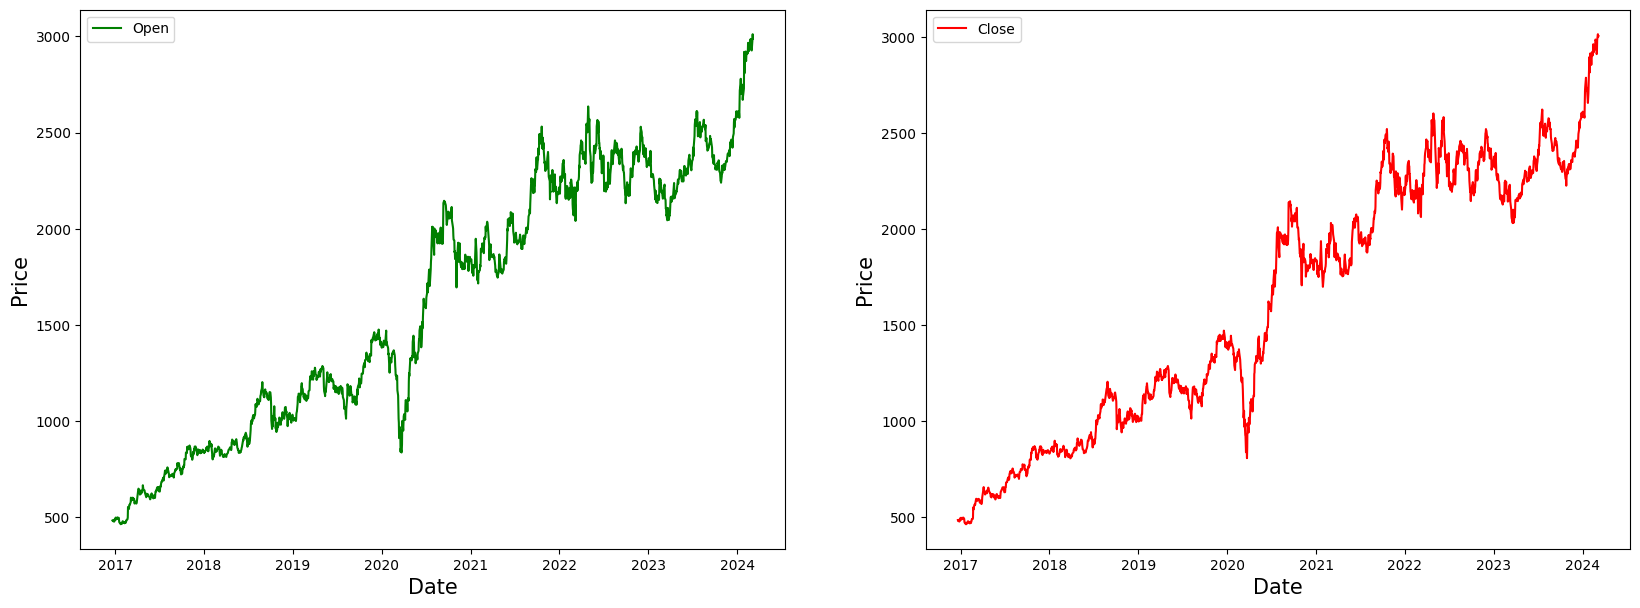

In [ ]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(Relince_stock ['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()
ax[1].plot(Relince_stock ['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()
fg.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
Relince_stock[Relince_stock.columns] = MMS.fit_transform(Relince_stock)


**Selecting 80 % for training and 20 % for testing**



In [ ]:
# Selecting 80 % for training and 20 % for testing
training_size = round(len(Relince_stock ) * 0.80)
training_size

1426

In [ ]:

train_data = Relince_stock [:training_size]
test_data  = Relince_stock [training_size:]
train_data.shape, Relince_stock.shape

((1426, 2), (1783, 2))

In [ ]:
# Function to create sequence of data for training and testing
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [ ]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [ ]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape


((1376, 50, 2), (1376, 2), (307, 50, 2), (307, 2))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)


Epoch 1/80
43/43 [==============================] - 10s 54ms/step - loss: 0.0144 - mean_absolute_error: 0.0778 - val_loss: 0.0061 - val_mean_absolute_error: 0.0669
Epoch 2/80
43/43 [==============================] - 2s 56ms/step - loss: 0.0010 - mean_absolute_error: 0.0236 - val_loss: 0.0017 - val_mean_absolute_error: 0.0308
Epoch 3/80
43/43 [==============================] - 2s 39ms/step - loss: 9.1409e-04 - mean_absolute_error: 0.0221 - val_loss: 0.0015 - val_mean_absolute_error: 0.0295
Epoch 4/80
43/43 [==============================] - 2s 37ms/step - loss: 8.4639e-04 - mean_absolute_error: 0.0212 - val_loss: 0.0011 - val_mean_absolute_error: 0.0257
Epoch 5/80
43/43 [==============================] - 1s 35ms/step - loss: 8.5768e-04 - mean_absolute_error: 0.0213 - val_loss: 0.0013 - val_mean_absolute_error: 0.0278
Epoch 6/80
43/43 [==============================] - 1s 35ms/step - loss: 8.1859e-04 - mean_absolute_error: 0.0207 - val_loss: 9.4816e-04 - val_mean_absolute_error: 0.0241
E

In [ ]:
test_predicted = model.predict(test_seq)
test_predicted[:20]

10/10 [==============================] - 1s 12ms/step


array([[0.7743986 , 0.76763886],
       [0.7645998 , 0.75819546],
       [0.7579536 , 0.75141406],
       [0.7642352 , 0.7568453 ],
       [0.76625323, 0.75903213],
       [0.7534758 , 0.7473743 ],
       [0.74461484, 0.73852676],
       [0.7526469 , 0.74537224],
       [0.7606653 , 0.7531335 ],
       [0.757359  , 0.7506651 ],
       [0.7508081 , 0.7445732 ],
       [0.72983474, 0.7245462 ],
       [0.7261225 , 0.71974486],
       [0.7347642 , 0.7271493 ],
       [0.738478  , 0.7309565 ],
       [0.73712504, 0.7301485 ],
       [0.73902947, 0.7320971 ],
       [0.74571586, 0.73852795],
       [0.74438024, 0.737703  ],
       [0.73383224, 0.72788   ]], dtype=float32)

In [ ]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:20]

array([[2437.031 , 2422.1943],
       [2412.0771, 2398.11  ],
       [2395.1519, 2380.8152],
       [2411.1487, 2394.6667],
       [2416.2878, 2400.2441],
       [2383.7485, 2370.5122],
       [2361.183 , 2347.9478],
       [2381.6377, 2365.4062],
       [2402.0576, 2385.2002],
       [2393.6377, 2378.905 ],
       [2376.955 , 2363.3684],
       [2323.544 , 2312.2922],
       [2314.0903, 2300.047 ],
       [2336.0974, 2318.9312],
       [2345.5552, 2328.6409],
       [2342.1096, 2326.5803],
       [2346.9595, 2331.5498],
       [2363.987 , 2347.951 ],
       [2360.5857, 2345.847 ],
       [2333.724 , 2320.7947]], dtype=float32)

In [ ]:
gs_slic_data = pd.concat([Relince_stock.iloc[-307:].copy(),pd.DataFrame(test_inverse_predicted,columns=['Open_predicted','Close_predicted'],index=Relince_stock.iloc[-307:].index)], axis=1)


In [ ]:
gs_slic_data[['Open','Close']] =MMS.inverse_transform(gs_slic_data[['Open','Close']]) # Inverse scaling


In [ ]:
gs_slic_data.head(10)

,Open,Close,Open_predicted,Close_predicted
Date,,,,
2022-12-09,2442.257080,2408.198486,2437.031006,2422.194336
2022-12-12,2386.415771,2411.890381,2412.077148,2398.110107
2022-12-13,2411.890381,2422.874268,2395.151855,2380.815186
2022-12-14,2434.550049,2414.105713,2411.148682,2394.666748
2022-12-15,2402.106689,2379.816162,2416.287842,2400.244141
2022-12-16,2373.032227,2368.047852,2383.748535,2370.512207
2022-12-19,2382.262207,2399.153076,2361.183105,2347.947754
2022-12-20,2384.938965,2419.920654,2381.637695,2365.406250
2022-12-21,2419.182129,2385.492676,2402.057617,2385.200195


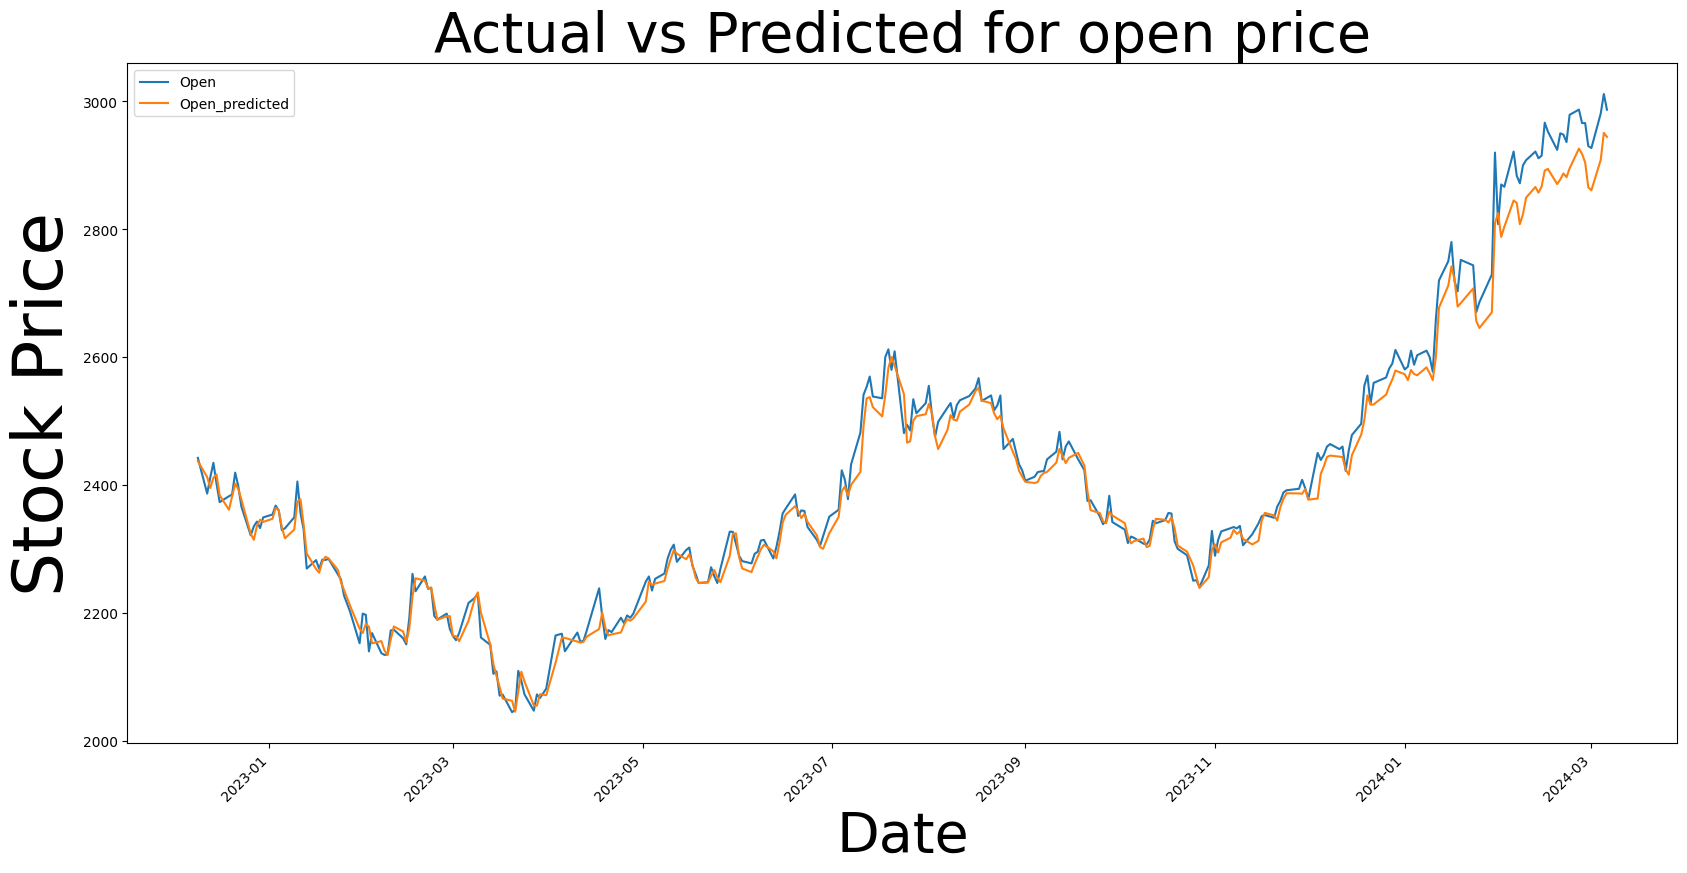

In [ ]:
gs_slic_data[['Open','Open_predicted']].plot(figsize=(20,10))
plt.xticks(rotation=45)
plt.xlabel('Date',size=40)
plt.ylabel('Stock Price',size=50)
plt.title('Actual vs Predicted for open price',size=40)
plt.show()

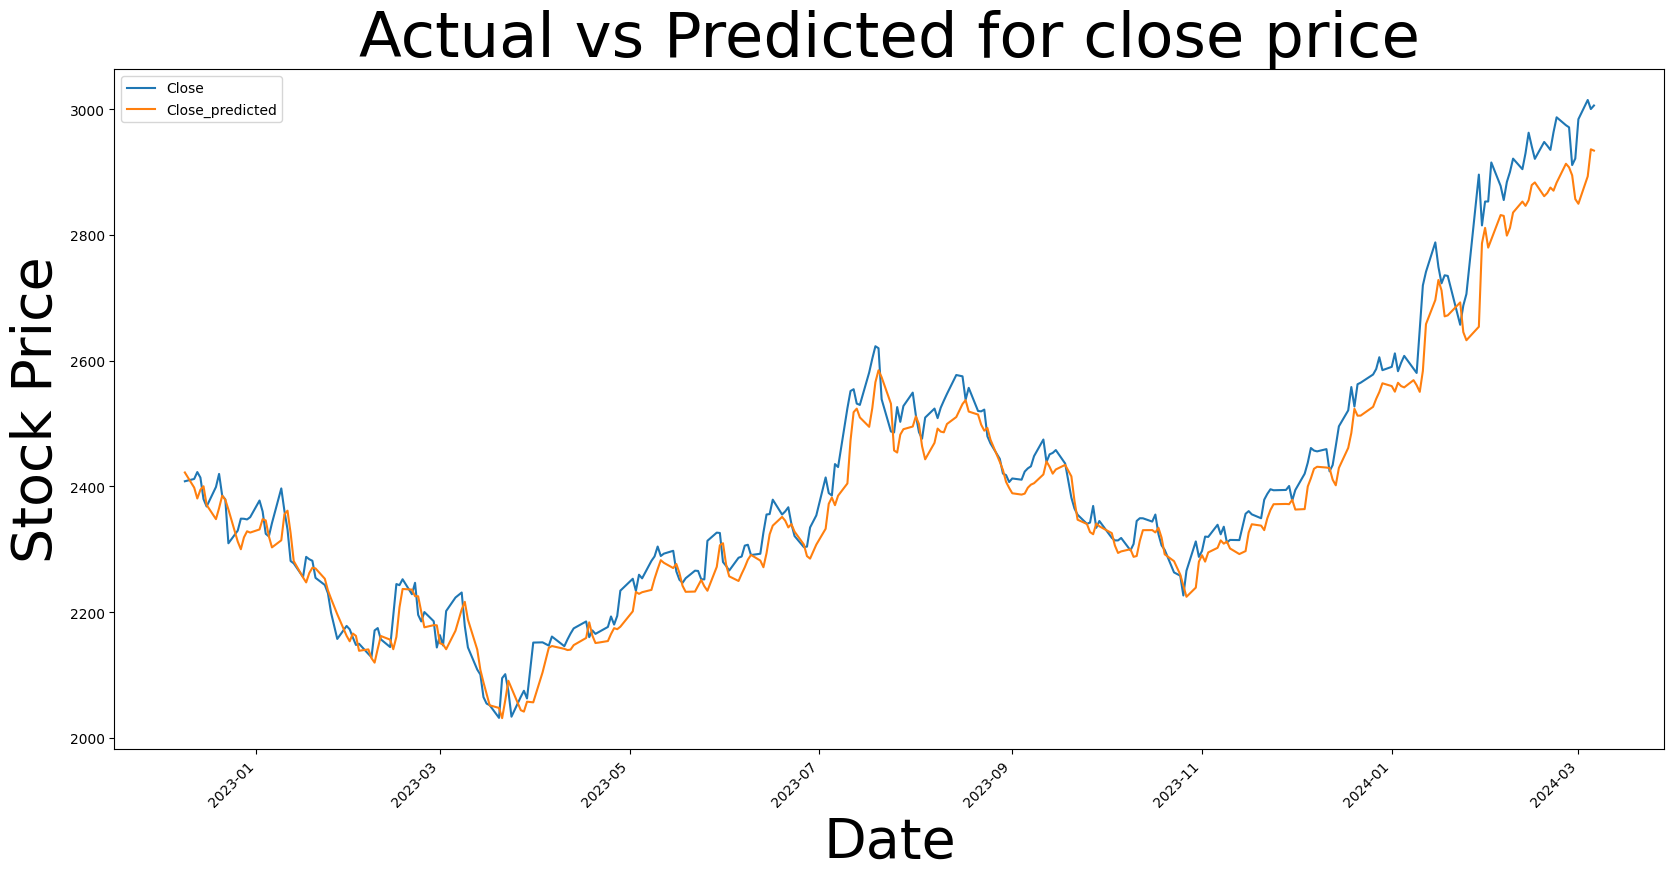

In [ ]:
gs_slic_data[['Close','Close_predicted']].plot(figsize=(20,10))
plt.xticks(rotation=45)
plt.xlabel('Date',size=40)
plt.ylabel('Stock Price',size=40)
plt.title('Actual vs Predicted for close price',size=45)
plt.show()

Creating a dataframe and adding 10 days to existing index


In [ ]:
# Creating a dataframe and adding 10 days to existing index

gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))


<ipython-input-68-238941946f56>:3: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))
<ipython-input-68-238941946f56>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))


In [ ]:
gs_slic_data['2024-02-21	':'2024-03-07']

,Open,Close,Open_predicted,Close_predicted
2024-02-21,2948.000000,2935.399902,2887.219971,2875.497803
2024-02-22,2936.300049,2963.500000,2881.428711,2870.515625
2024-02-23,2979.000000,2987.250000,2895.217773,2883.279785
2024-02-26,2987.100098,2974.649902,2926.153320,2913.342285
2024-02-27,2966.050049,2971.300049,2917.778320,2907.655029
2024-02-28,2966.000000,2911.250000,2904.245605,2894.864258
2024-02-29,2930.000000,2921.600098,2865.468018,2857.109863
2024-03-01,2927.000000,2984.250000,2860.881104,2849.685059
2024-03-04,2980.949951,3014.800049,2908.449463,2893.361572
2024-03-05,3011.550049,3000.399902,2950.760986,2936.360107


In [ ]:
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=gs_slic_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)


In [ ]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 22ms/step


In [ ]:
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])


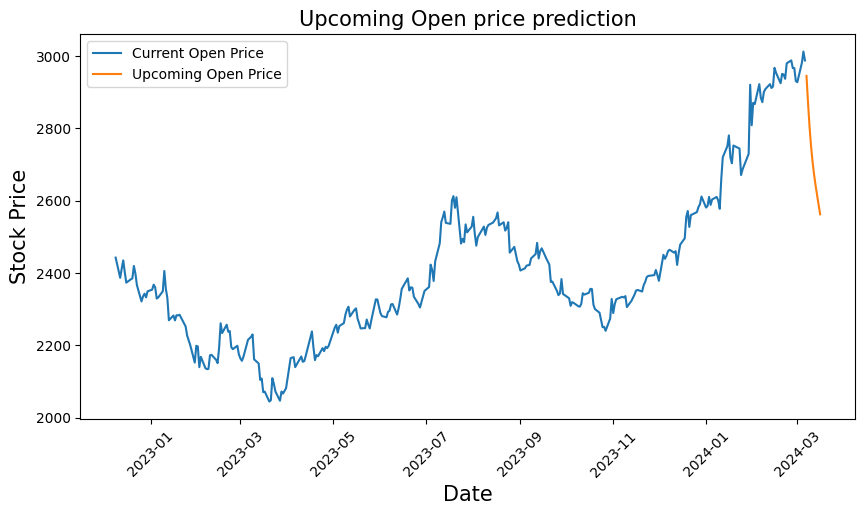

In [ ]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-25':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-25':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

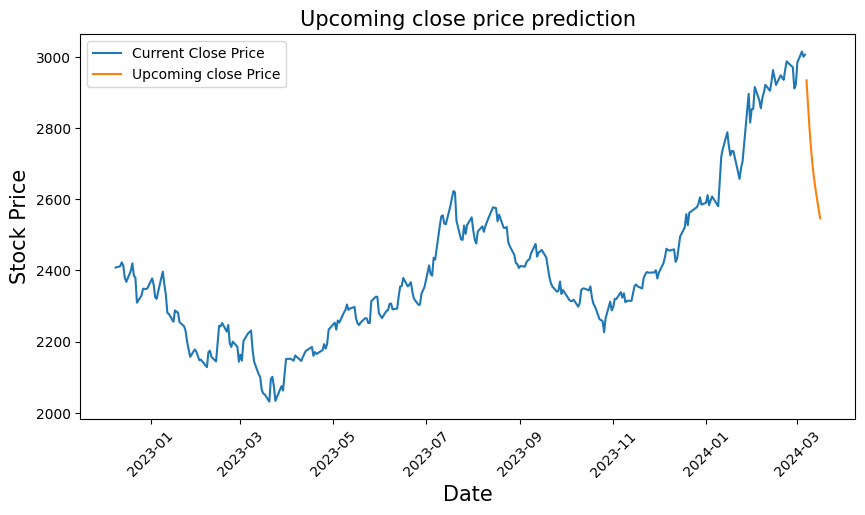

In [ ]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-25':,'Close'],label='Current Close Price')
ax.plot(upcoming_prediction.loc['2021-04-25':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()

In [ ]:
upcoming_prediction.tail()

,Open,Close
2024-03-12,2671.633273,2657.791585
2024-03-13,2641.326902,2626.416893
2024-03-14,2613.707668,2598.308365
2024-03-15,2587.413256,2571.851465
2024-03-16,2561.854114,2546.259370
